<img src="https://github.com/djp840/MSDS_453_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS453 - Research Assignment 03 - Ontology Plus Context and Modeling

Take the ontology that you developed in week 6 and consider how your ten chosen documents for this quarter's class corpus map to that ontology.

Protégé is a tool that takes inputs for a human-created Ontology and creates a visualization. 

Use Python algorithms to generate Knowledge Graphs from your documents.

### Importing Packages

In [161]:
import re
import pandas as pd
import spacy
from spacy import displacy

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [162]:
from rake_nltk import Rake
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist

import re
import string

In [163]:
stop_words = set(stopwords.words("english"))

In [164]:
import warnings
warnings.filterwarnings('ignore')

### Mount Google Drive to Colab Environment

In [165]:
#from google.colab import drive
#drive.mount('/content/gdrive')

<div class="alert alert-block alert-info">
    <b>Spacy </b><br>
    https://spacy.io/usage/models
    </div>

In [166]:
nlp = spacy.load('en_core_web_sm')

In [167]:
def process_corpus(data):
        
    #create empty list to store text documents titles
    titles=[]
    
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        temp_text=data['DSI_Title'].iloc[i]
        titles.append(temp_text)
    
    #create empty list to store text documents
    text_body=[]
    
    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)
    
    #Note: the text_body is the unprocessed list of documents read directly form 
    #the csv.
        
    #empty list to store processed documents
    processed_text=[]
    #for loop to process the text to the processed_text list
    for i in text_body:
        text=clean_doc(i)
        processed_text.append(text)
    
    final_processed_text=[]
    
    for i in processed_text:
        temp_DSI=i[0]
        for k in range(1,len(i)):
            temp_DSI=temp_DSI+' '+i[k]
        final_processed_text.append(temp_DSI)
    
    return titles, final_processed_text, processed_text

In [168]:
path_to_file=r'C:\Users\hag8665\Desktop\MSDS 453\MSDS453_Class_CorpusV4.csv'
data = pd.read_csv(path_to_file)

In [169]:
data = data.loc[data['Movie Title']=='Frozen_2']

In [170]:
titles, final_processed_text, processed_text =  process_corpus(data)

In [171]:
#NER Regularizaton
import spacy
from spacy import displacy
NER = spacy.load("en_core_web_sm")
text1= NER(''.join(final_processed_text))
x = []
for word in text1.ents:
    #print(word.text,word.label_)
    x.append(str(word.text))
    x1= ''.join(x)

In [172]:
def remove_stop_words(in_text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
#     filtered_sentence = [] 
#     for w in word_tokens: 
#         if w not in stop_words: 
#             filtered_sentence.append(w) 

    return filtered_sentence

In [173]:
def remove_punctuation(in_text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(in_text))
    return text

In [174]:
def run_rake(in_text):
    r = Rake()
    r.extract_keywords_from_text(in_text)
    rake_phrases= r.get_ranked_phrases()
    return rake_phrases

In [175]:
def apply_lemmatization(in_text):
    # Lemmatization
    lem = WordNetLemmatizer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([lem.lemmatize(w) for w in word_list])
    return output

In [176]:
# method 3 remove punctutaion  , stopwords and lemetization, lower and keep character


def clean_doc(doc): 
    
    
    #doc = remove_punctuation(doc)
    doc= ' '.join(remove_stop_words(doc))
    doc = apply_lemmatization(doc)
    doc = ' '.join(remove_stop_words(doc))

    #doc = (run_rake(doc))
    #split document into individual words
    tokens= doc#.split()   

    tokens = list(filter(None, doc))

    re_punc = re.compile('[%s]' % re.escape(string.punctuation))

    #remove punctuation from each word
    #tokens = [re_punc.sub('', w) for w in doc]
    tokens = [word.lower() for word in tokens]

    return doc

### Load Data and Create Blog of Text for Knowledge Graph Generation

In [204]:
path_to_file=r'C:\Users\hag8665\Desktop\MSDS 453\MSDS453_Class_CorpusV4.csv'
data = pd.read_csv(path_to_file)
#corpusJoined = ' '.join([x for x in data['Text']]).split('.')

In [205]:
data = data.loc[data['Movie Title']=='Frozen_2']

In [206]:
#data['Text'] = data['Text'].apply(clean_doc)

In [207]:
corpusJoined = ' '.join([x for x in data['Text']]).split('.')

In [208]:
# corpusJoined = [clean_doc(x) for x in corpusJoined]

In [209]:
corpusJoined

['Parents, you can breathe a sigh of relief',
 ' Frozen 2s new showstopper Into the Unknown isnt as aggressive an earworm as Let it Go',
 ' Its more lyrically complex, with a lot more high notes  the kind thatll break your eardrums if sung by anyone who isnt Idina Menzel  and its hard to imagine a car full of kids howling such a delicate scale for hours upon hours',
 '\r\nFrozen 2, Disneys sequel to its $1',
 '3bn hit, is more mature, ambitious, and intricate than its predecessor',
 ' That doesnt automatically make it better  Frozens success was built on a simple and relatable story of sisterly love  but its different enough not to feel like a stale rerun',
 ' There are surprises here to uncover, and a renewed sense of energy to the proceedings',
 ' Admittedly, the film does play with fire by taking the same path as other sequels, padding out a characters backstory in the hope itll add depth to their world',
 ' There are echoes of last months Maleficent: Mistress of Evil, as Queen Elsa

### Function Entity Extraction

In [210]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

### Entity Pair Extraction from Corpus

In [211]:
entity_pairs = []

for i in tqdm(corpusJoined):
  entity_pairs.append(get_entities(i))

100%|███████████████████████████████████████████████████████████████████████████████| 323/323 [00:02<00:00, 158.20it/s]


In [212]:
entity_pairs[:5]

[['Parents  you', 'relief'],
 ['as  it', 'Unknown'],
 ['who', 'delicate Idina Menzel hours'],
 ['2  Disneys', '$  1'],
 ['3bn  hit', 'more  predecessor']]

### Function Get Relation

In [213]:
def get_relation(sent):
    try:
        doc = nlp(sent)
        # Matcher class object 
        matcher = Matcher(nlp.vocab)
        #define the pattern 
        pattern = [{'DEP':'ROOT'}, 
                {'DEP':'prep','OP':"?"},
                {'DEP':'agent','OP':"?"},  
                {'POS':'ADJ','OP':"?"}] 
        matcher.add("matching_1", [pattern]) 
        matches = matcher(doc)
        k = len(matches) - 1
        span = doc[matches[k][1]:matches[k][2]] 
        return(span.text)
    except:
        pass

In [214]:
relations = []
for i in corpusJoined:
    relations.append(get_relation(i))

In [215]:
print(pd.Series(relations).value_counts()[:10])

is         35
are        11
has         8
was         6
s           5
made        5
have        4
make        4
watched     3
hit         3
dtype: int64


### Extract Subject and Object

In [216]:
#extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [217]:
kg_df.to_excel(r"C:\Users\hag8665\Desktop\MSDS 453\kg_df.xlsx", index = False)

In [218]:
kg_df['edge'].value_counts()

is             35
are            11
has             8
was             6
s               5
               ..
locked into     1
reflects        1
be              1
lived in        1
knows           1
Name: edge, Length: 192, dtype: int64

### Create a Directed-graph from Dataframe

In [231]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

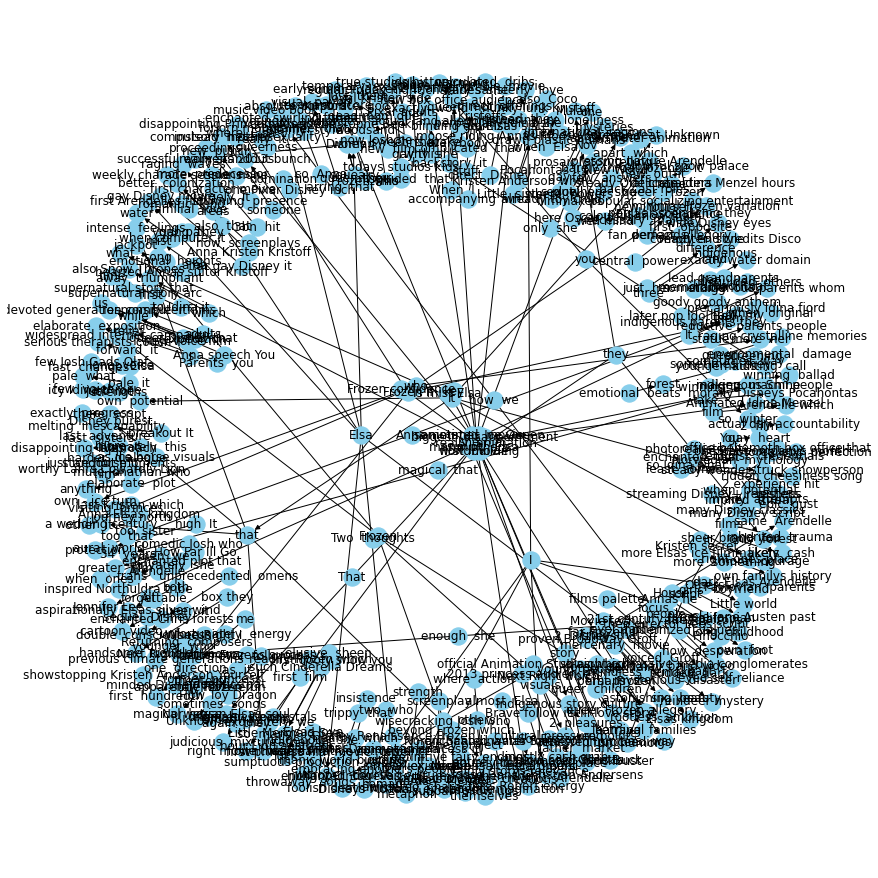

In [232]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Plot Graph - Nodes and Edges

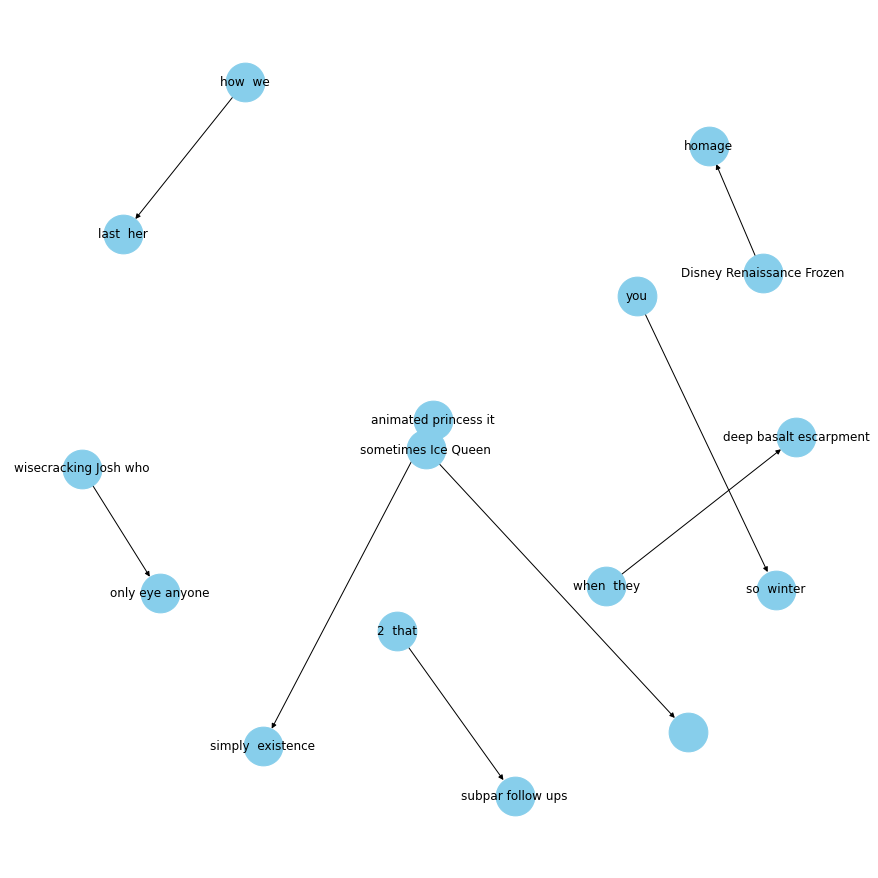

In [236]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="has"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 1) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
# def filter_graph(pairs, node):
#     k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
#             create_using=nx.MultiDiGraph())
#     edges = nx.dfs_successors(k_graph, node)
#     nodes = []
#     for k, v in edges.items():
#         nodes.extend([k])
#         nodes.extend(v)
#     subgraph = k_graph.subgraph(nodes)
#     layout = (nx.random_layout(k_graph))
#     nx.draw_networkx(
#         subgraph,
#         node_size=1000,
#         arrowsize=20,
#         linewidths=1.5,
#         pos=layout,
#         edge_color='red',
#         edgecolors='black',
#         node_color='white'
#         )
#     labels = dict(zip((list(zip(pairs.subject, pairs.object))),
#                     pairs['relation'].tolist()))
#     edges= tuple(subgraph.out_edges(data=False))
#     sublabels ={k: labels[k] for k in edges}
#     nx.draw_networkx_edge_labels(subgraph, pos=layout, edge_labels=sublabels,
#                                 font_color='red')
#     plt.axis('off')
#     plt.show()